## Conversion_rate prediction

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.inspection import plot_partial_dependence, partial_dependence
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from pdpbox import pdp, get_dataset, info_plots

In [23]:
data = pd.read_csv('../DS_Challenges/Conversion_Rate/conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [76]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


<AxesSubplot:>

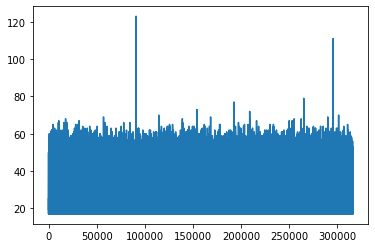

In [78]:
data['age'].plot()

In [79]:
data.loc[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


<AxesSubplot:>

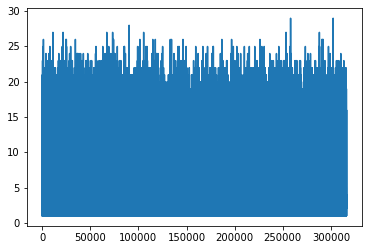

In [80]:
data['total_pages_visited'].plot()

### data cleaning

In [24]:
data=data.loc[data['age']<100]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


### EDA

About 50% people are between 25~37

<AxesSubplot:xlabel='age'>

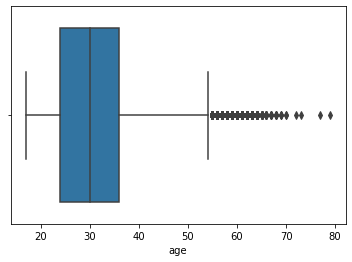

In [13]:
sns.boxplot(data=data, x='age')

<AxesSubplot:xlabel='country', ylabel='count'>

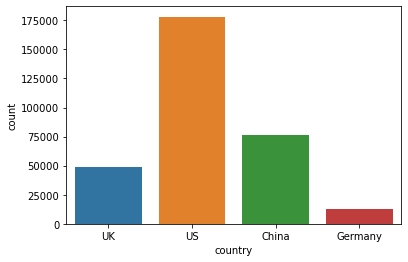

In [8]:
sns.countplot(data=data, x='country')

<AxesSubplot:xlabel='new_user', ylabel='count'>

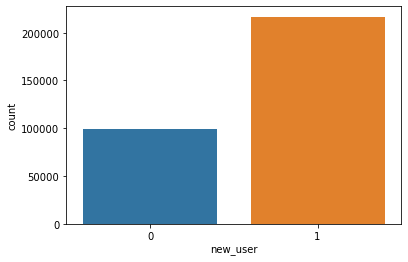

In [14]:
sns.countplot(data=data, x='new_user')

<AxesSubplot:xlabel='source', ylabel='count'>

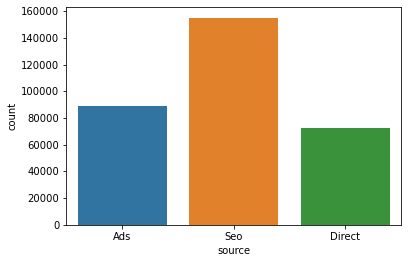

In [15]:
sns.countplot(data=data, x='source')

<AxesSubplot:xlabel='total_pages_visited'>

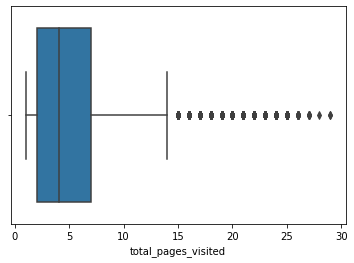

In [16]:
sns.boxplot(data=data, x='total_pages_visited')

<AxesSubplot:xlabel='converted', ylabel='count'>

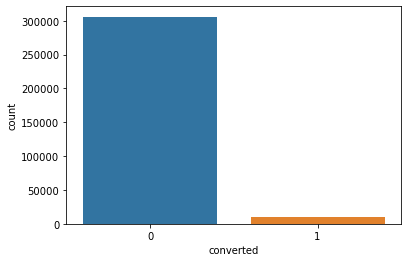

In [18]:
sns.countplot(data=data, x='converted')

In [19]:
data.converted.value_counts()

0    306000
1     10198
Name: converted, dtype: int64

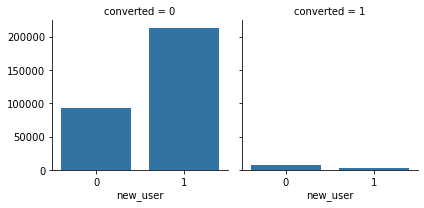

In [26]:
g = sns.FacetGrid(data, col = 'converted')
g.map(sns.countplot, 'new_user')

/Users/yli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


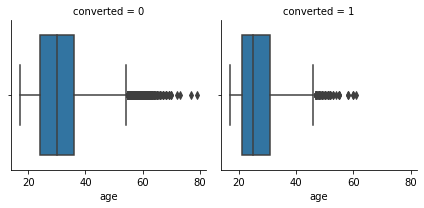

In [30]:
g = sns.FacetGrid(data, col = 'converted')
g.map(sns.boxplot, 'age')

/Users/yli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


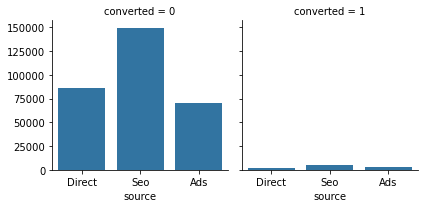

In [31]:
g = sns.FacetGrid(data, col = 'converted')
g.map(sns.countplot, 'source')

/Users/yli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


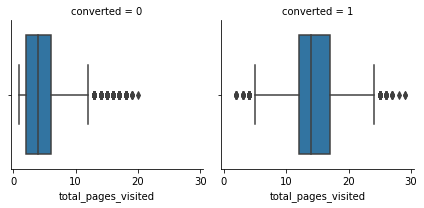

In [33]:
# total_page_visited matters a lot since customers who visited more pages tend (10~20) to buy
g = sns.FacetGrid(data, col = 'converted')
g.map(sns.boxplot, 'total_pages_visited')

/Users/yli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


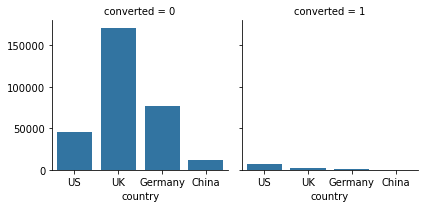

In [34]:
# US customers tend to buy
g = sns.FacetGrid(data, col = 'converted')
g.map(sns.countplot, 'country')

<AxesSubplot:xlabel='country', ylabel='converted'>

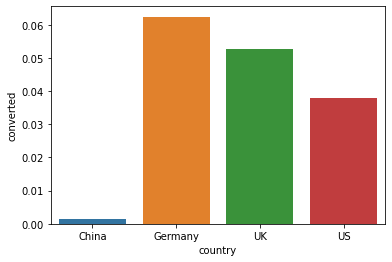

In [88]:
# Chinese conversion_rate is the lowest
group_country = data.groupby('country').agg({'converted':'mean'}).reset_index()
sns.barplot(data = group_country, x = 'country', y = 'converted')

<AxesSubplot:xlabel='total_pages_visited', ylabel='converted'>

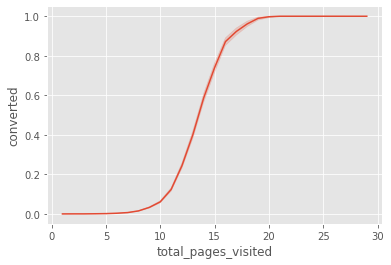

In [92]:
# Definitely spending more time on the site implies higher probability of conversion!
plt.style.use('ggplot')
sns.lineplot(data=data, x = 'total_pages_visited', y = 'converted')

In [5]:
data = pd.get_dummies(data)

In [6]:
data['age'] = (data['age']-data['age'].mean())/data['age'].std()

In [7]:
data['total_pages_visited'] = (data['total_pages_visited']-data['total_pages_visited'].mean())/data['total_pages_visited'].std()
data

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,-0.673520,1,-1.159191,0,0,0,1,0,1,0,0
1,-0.915389,1,0.038036,0,0,0,0,1,0,0,1
2,-0.310718,1,-0.261270,0,0,0,0,1,0,0,1
3,1.019559,1,0.038036,0,1,0,0,0,0,0,1
4,-0.068849,1,0.337343,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,-0.552586,1,1.235264,0,0,0,0,1,1,0,0
316196,-0.431652,1,0.337343,0,0,0,0,1,0,1,0
316197,-0.673520,0,-0.261270,0,1,0,0,0,1,0,0
316198,-1.036323,0,-0.261270,0,0,0,0,1,0,0,1


### Modelling

In [8]:
%%time
y = data['converted']
X = data.drop(columns='converted')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1024)
clf = RandomForestClassifier(oob_score=True, random_state=1024)
clf.fit(X_train,y_train)

y_pred = clf.predict_proba(X_test)[:,1]
print('oob_score : %f ,auc : %f' % (clf.oob_score_,roc_auc_score(y_test, y_pred)))

train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print(f'train_score: {train_score}, test_score: {test_score}')

oob_score : 0.984389 ,auc : 0.953580
train_score: 0.9881561365918453, test_score: 0.9849936748893106
CPU times: user 15.5 s, sys: 307 ms, total: 15.8 s
Wall time: 15.9 s


In [57]:
%%time
# 1.迭代次数
param_test1 = {'n_estimators':range(10,101,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=20,
                                  min_samples_leaf=10,max_depth=5,max_features='sqrt' ,random_state=10),
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,y_train)
means = gsearch1.cv_results_['mean_test_score']
std = gsearch1.cv_results_['std_test_score']
params = gsearch1.cv_results_['params']
for mean,std,param in zip(means,std,params):
    print("mean : %f std : %f %r" % (mean,std,param))
print('best_params :',gsearch1.best_params_)

mean : 0.967915 std : 0.002680 {'n_estimators': 10}
mean : 0.970259 std : 0.003539 {'n_estimators': 20}
mean : 0.974843 std : 0.002603 {'n_estimators': 30}
mean : 0.976106 std : 0.002463 {'n_estimators': 40}
mean : 0.975750 std : 0.002556 {'n_estimators': 50}
mean : 0.975983 std : 0.002350 {'n_estimators': 60}
mean : 0.975659 std : 0.002395 {'n_estimators': 70}
mean : 0.975645 std : 0.002342 {'n_estimators': 80}
mean : 0.975479 std : 0.002320 {'n_estimators': 90}
mean : 0.975283 std : 0.002321 {'n_estimators': 100}
best_params : {'n_estimators': 40}


In [61]:
%%time
# 2.最大深度和内部节点再划分所需最小样本数
param_test2 = {'max_depth':range(3,10,1), 'min_samples_split':range(10,101,10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 40,
                                  min_samples_leaf=10,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train,y_train)
means = gsearch2.cv_results_['mean_test_score']
std = gsearch2.cv_results_['std_test_score']
params = gsearch2.cv_results_['params']
for mean,std,param in zip(means,std,params):
    print("mean : %f std : %f %r" % (mean,std,param))
print('best_params :',gsearch2.best_params_)

/Users/yli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


mean : 0.966999 std : 0.003176 {'max_depth': 3, 'min_samples_split': 10}
mean : 0.966999 std : 0.003176 {'max_depth': 3, 'min_samples_split': 20}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 30}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 40}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 50}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 60}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 70}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 80}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 90}
mean : 0.966998 std : 0.003176 {'max_depth': 3, 'min_samples_split': 100}
mean : 0.971587 std : 0.002505 {'max_depth': 4, 'min_samples_split': 10}
mean : 0.971587 std : 0.002505 {'max_depth': 4, 'min_samples_split': 20}
mean : 0.971586 std : 0.002505 {'max_depth': 4, 'min_samples_split': 30}
mean : 0.971586 std : 0.002506 {'max_depth': 4, 'm

In [63]:
# 查看此时结果
rf2 = RandomForestClassifier(n_estimators= 40, max_depth=9, min_samples_split=30,
                                  min_samples_leaf=10,max_features='sqrt' ,oob_score=True, random_state=10)
rf2.fit(X_train,y_train)
y_predprob2 = rf2.predict_proba(X_test)[:,1]
print('oob_score : %f ,auc : %f' % (rf2.oob_score_,roc_auc_score(y_test, y_predprob2)))

oob_score : 0.985630 ,auc : 0.981753


In [64]:
# 3.内部节点再划分所需最小样本数和叶子节点最少样本数
param_test3 = {'min_samples_split':range(10,101,10), 'min_samples_leaf':range(5,51,5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 40, max_depth=9,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train,y_train)
means = gsearch3.cv_results_['mean_test_score']
std = gsearch3.cv_results_['std_test_score']
params = gsearch3.cv_results_['params']
for mean,std,param in zip(means,std,params):
    print("mean : %f std : %f %r" % (mean,std,param))
print('best_params :',gsearch3.best_params_)

KeyboardInterrupt: 

In [95]:
rf2.feature_importances_

array([2.95712755e-02, 4.25409140e-02, 8.90035292e-01, 2.59942863e-02,
       1.98813181e-03, 3.90373208e-03, 3.18888232e-03, 9.98494027e-04,
       8.85433592e-04, 8.93558161e-04])

In [12]:
feature_names = data.drop(columns='converted').columns

<AxesSubplot:title={'center':'Feature Importance Plot'}, xlabel='importance', ylabel='feature'>

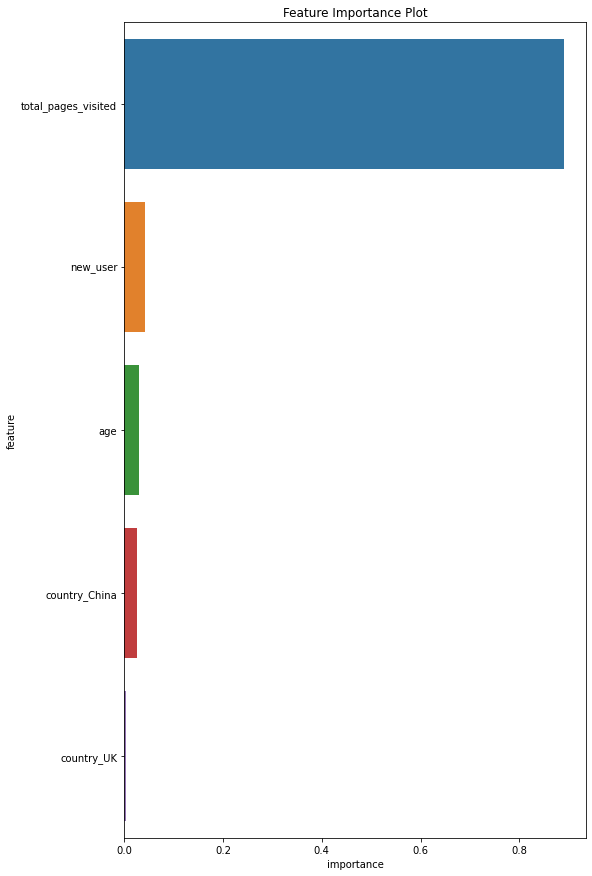

In [73]:
# Feature importance plot
feature_importance = pd.DataFrame({'feature':feature_names, 'importance':rf2.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:5])

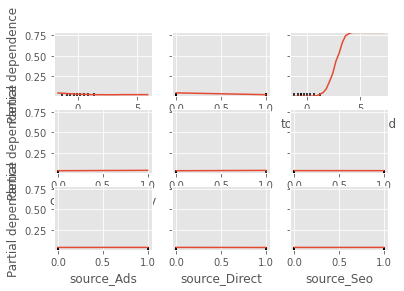

In [120]:
plot_partial_dependence(estimator=rf2, X=X_train, features=[0,1,2,4,5,6,7,8,9], feature_names=feature_names#X_train.columns.tolist()
                       )
plt.show()

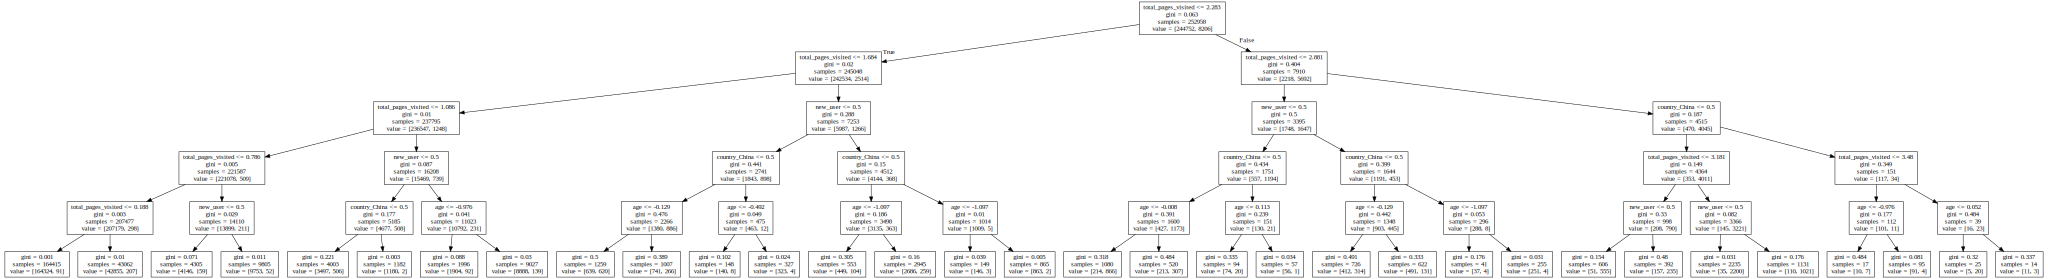

In [13]:
tree_model = DecisionTreeClassifier(random_state=1024, max_depth=5, min_samples_split=5).fit(X_train,y_train)
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

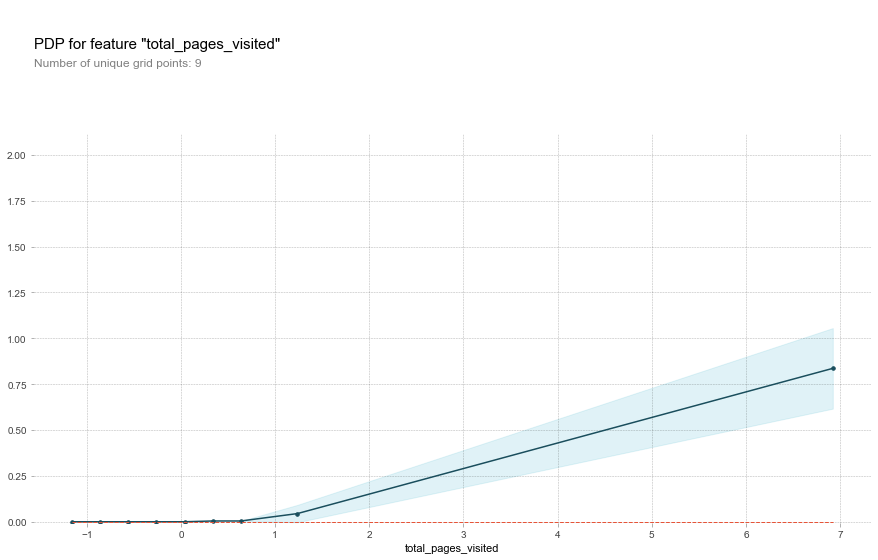

In [22]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=X_test, model_features=feature_names, feature='total_pages_visited')
 
# plot it
pdp.pdp_plot(pdp_goals, 'total_pages_visited')
plt.show()